The first step is coming up with an idea Identify an original business problem for your project.

The second step is locating your data. 

Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem.

Then, do a graphical analysis creating a minimum of four graphs.

Label your graphs appropriately and explain/analyze the information provided by each graph.

Write a short overview/conclusion of the insights gained from your graphical analysis.

In [37]:
# Grouping / Classification of documents based on Text Analysis - Part 1 
## Graphics Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [38]:
#check versions of packages
print('Python version:')  
!python --version
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
# print('scikit-learn version:', sklearn.__version__)
# print('NLTK version:', nltk.__version__)

Python version:
Python 3.8.5
pandas version: 1.2.4
numpy version: 1.19.2


In [39]:
# Setting the parameters for the pandas dataframe

output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [40]:
#Step 1: Load data into a dataframe 
filename = "~/Documents/mygithub/bu_dsc/data/external/News_Category_Dataset_v2.json"

df_all = pd.read_json(filename, lines = True)
#display the first few rows of data
df_all.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [41]:
# Step 2: Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
print("The dimension of the table is: ", df_all.shape)

The dimension of the table is:  (200853, 6)


In [42]:
#Step 3: what type of variables are in the table 
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
# Does this present any more questions for you? 
# Does it lead you to a conclusion yet?

print("Describe Data") 
print(df_all.describe()) 
# print("Summarized Data") 
# print(df_all.describe(include='O'))

Describe Data
        category        headline authors                                                                              link short_description                 date
count     200853          200853  200853                                                                            200853            200853               200853
unique        41          199344   27993                                                                            200812            178353                 2309
top     POLITICS  Sunday Roundup          https://www.huffingtonpost.comhttp://testkitchen.huffingtonpost.com/thecrossing/                    2012-12-21 00:00:00
freq       32739              90   36620                                                                                 2             19712                  100
first        NaN             NaN     NaN                                                                               NaN               NaN  2012-01-28 00:00:00
last         N

In [43]:
# Getting the date range for the observations
print('Minimum Date of post: ', df_all['date'].min())
print('Maximum Date of post: ', df_all['date'].max())

Minimum Date of post:  2012-01-28 00:00:00
Maximum Date of post:  2018-05-26 00:00:00


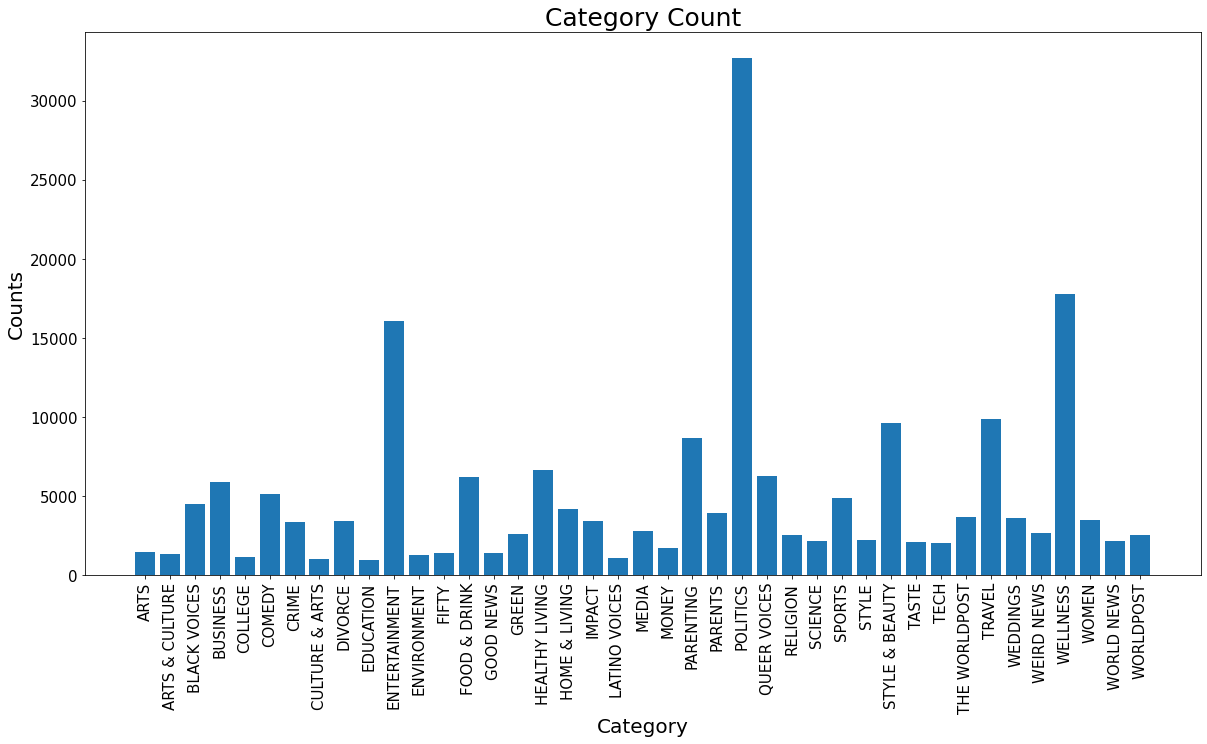

In [45]:
# Barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
#   
%matplotlib inline 

plt.rcParams['figure.figsize'] = (20, 10)

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 

fig, ax = plt.subplots()

X_category = df_all.groupby('category').size().reset_index(name='Counts')['category']
Y_count = df_all.groupby('category').size().reset_index(name='Counts')['Counts']

plt.xticks(rotation=90)
ax.bar(X_category, Y_count) 

ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)



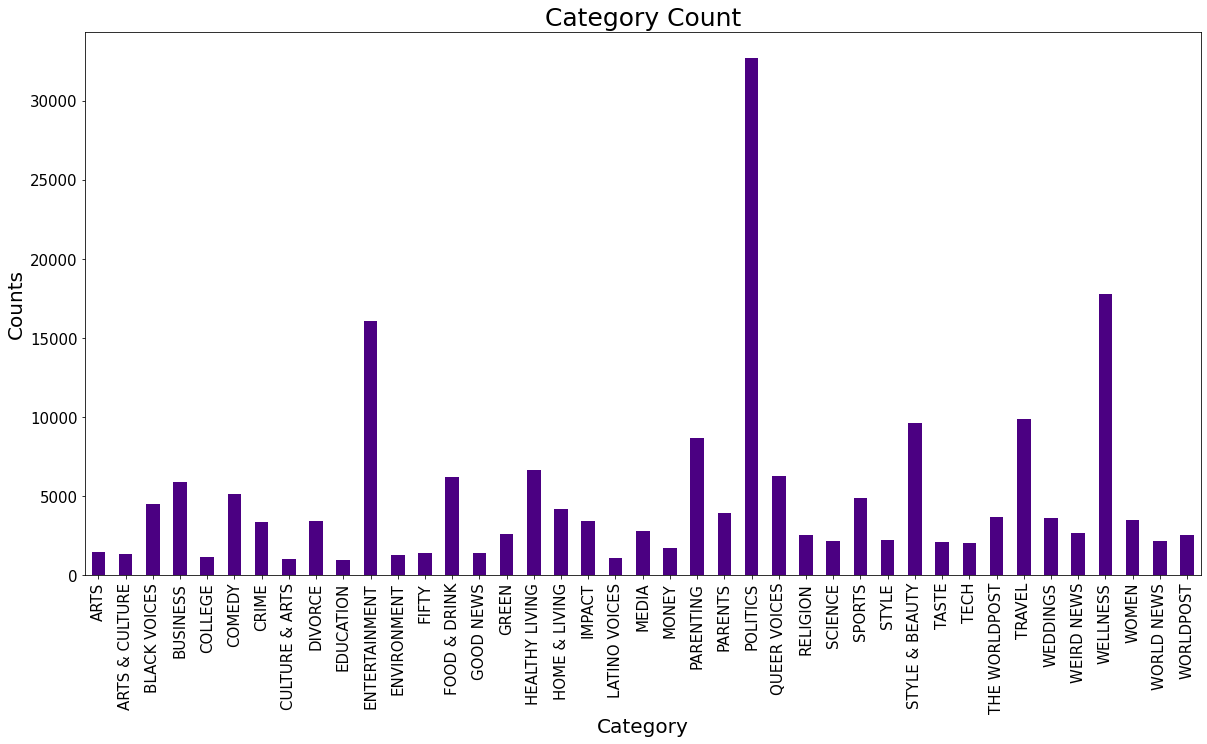

In [55]:
# Barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
#   
%matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 

df1 = df_all.groupby(['category'])['category'].count()

ax = df1.plot(kind='bar', figsize=(20,10), color="indigo")

ax.set_alpha(0.8)
plt.xticks(rotation=90)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

plt.show()


In [94]:
# Aggregating the counts by category for the overall data set
df_agg = df_all.groupby(['category'])['category'].count()
df_agg

category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
Name: c

In [122]:
# Creating a separate dataframe taking in the category and date features from the actual dataframe

df_yr_catg = df_all[['category','date']]
# creating a new column with only the year value from date

df_yr_catg['date'] = pd.to_datetime(df_yr_catg['date'])
df_yr_catg['year'] = df_yr_catg['date'].apply(lambda x: x.year)

df_yr_catg_agg = df_yr_catg.groupby(['year','category'])['category'].count()
df_yr_catg_agg.head(25)

year  category      
2012  BLACK VOICES       307
      BUSINESS           679
      COMEDY             604
      CRIME              199
      CULTURE & ARTS     343
      DIVORCE           1256
      ENTERTAINMENT      562
      ENVIRONMENT        482
      FOOD & DRINK      1823
      HOME & LIVING     1620
      IMPACT             332
      MONEY             1434
      PARENTING         3127
      QUEER VOICES       474
      SCIENCE            347
      SPORTS             271
      STYLE & BEAUTY    5193
      TECH               442
      TRAVEL            3229
      WEDDINGS          1493
      WELLNESS          7138
2013  BLACK VOICES       320
      BUSINESS           846
      COMEDY             487
      CRIME              236
Name: category, dtype: int64

In [124]:
# Years under consideration
years_lst = set(df_yr_catg['year'])
indexers = list(years_lst)

In [125]:
# Getting the categories as columns
category_lst = set(df_yr_catg['category'])
columns = list(category_lst)

In [126]:
# Getting the values separately
data = df_yr_catg_agg[:].values

In [127]:
# New dataframe
dframe1 = pd.DataFrame(data,index=indexers,columns=columns)
dframe1.info

ValueError: Shape of passed values is (197, 1), indices imply (7, 41)